## Интернет-магазин. Гипотезы и анализ A/B тестирования.


### Задача: 
Отдел маркетинга подготовил список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### План работы:

#### Часть 1. Приоритизация гипотез.

- Примените фреймворк ICE для приоритизации гипотез.
- Примените фреймворк RICE для приоритизации гипотез.

#### Часть 2. Анализ A/B-теста:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его.

## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [ ]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
orders = pd.read_csv('/datasets/orders.csv')

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [ ]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
hypo.columns = hypo.columns.str.replace(' ', '_').str.lower()
visitors.columns = visitors.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

In [ ]:
visitors.duplicated().sum()

0

In [ ]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
orders.visitorid.count()

1197

In [ ]:
orders.groupby('visitorid')['transactionid'].count().sort_values()

visitorid
5114589        1
2705308997     1
2710193528     1
2710478747     1
2710492161     1
              ..
3717692402     5
2038680547     8
2378935119     9
4256040402    11
2458001652    11
Name: transactionid, Length: 1031, dtype: int64

In [ ]:
orders.query('visitorid == "2458001652"')
# видим на примере одного покупателя, что есть случаи, когда покупатель попадает сразу в две группы

,transactionid,visitorid,date,revenue,group
133,3060563671,2458001652,2019-08-22,5190,A
380,1177690313,2458001652,2019-08-25,2385,B
454,3755354294,2458001652,2019-08-06,7349,B
456,543654048,2458001652,2019-08-06,1620,A
483,2280027650,2458001652,2019-08-06,6681,B
611,1244084011,2458001652,2019-08-04,340,A
692,3586870909,2458001652,2019-08-09,5227,B
727,3959083601,2458001652,2019-08-07,17379,A
883,2412219836,2458001652,2019-08-05,2420,B
916,527333943,2458001652,2019-08-08,5227,B


In [ ]:
dd3 = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique())
len(dd3)

58

In [ ]:
len(dd3) / orders.visitorid.count() *100

4.845446950710109

#### Вывод

Названия столбцов были приведены к удобному формату, пропусков и дубликатов - нет. Датасеты готовы к дальнейшей обработке.

### Часть 1. Приоритизация гипотез.

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
hypo['ICE'] = hypo['impact'] * hypo['confidence'] / hypo['efforts']

In [ ]:
ICE = hypo[['hypothesis','ICE']].sort_values(ascending=False, by='ICE')
ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['efforts']

In [ ]:
RICE = hypo[['hypothesis','RICE']].sort_values(ascending=False, by='RICE')
RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [ ]:
hypo.sort_values(ascending=False, by='RICE')

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод

Фреймворк RICE учитывает охват гипотезы, что свою очередь отражается на приоритизиации относительно фреймворка ICE. Так, например, явный лидер в ICE - гипотеза 8. Однако в RICE данная гипотеза лишь в середине таблице. Что обусловленно максимально низкой оценкой охвата данной гипотезы - акция, которая дает скидку лишь в день рождения, в рамках тестов охватит менее 10% пользователей.

Явным же лидером (с двухкратным отрывом) в RICE является гипотеза номер 7. Она входила в топ-3 гипотез по ICE, однако с учетом охвата (который оценен в 10) в RICE у нее нет конкурентов. Гиоптеза предополагает добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. А значит гипотеза на тестовом этапе охватит всех (ну или почти всех) посетелей сайта.

### Часть 2. Анализ A/B-теста

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [ ]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

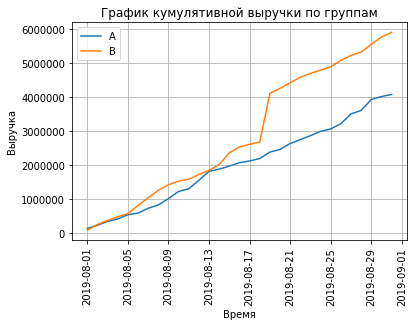

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Время')
plt.xticks(rotation='vertical')
plt.show()

### Вывод

Видим на графике примерно однаковый рост обеих групп, однако примерно в середине тестового периода присходит резкий скачок в рамках группы B. После этого скачка рост двух групп продолжает идти +- синхронно. Можно предположить, что скачок обусловлен несколькими покупками с чеком гораздо выше среднего.

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

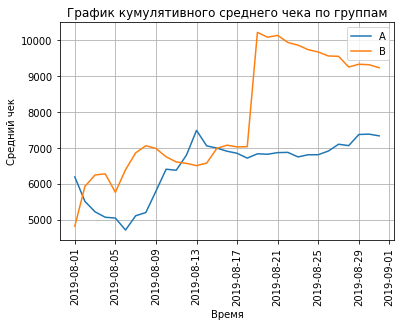

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.grid()
plt.xticks(rotation='vertical')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Время')
plt.show()

### Вывод

На графике кумулятивного среднего чека также видим резкий скачок в середине тестового периода, что в свою очередь подтверждает предположение выше.

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

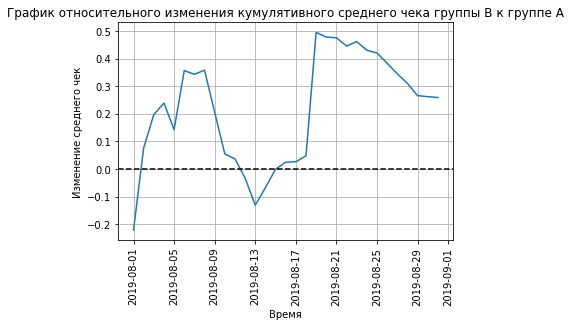

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение среднего чек')
plt.xlabel('Время')
plt.grid()
plt.xticks(rotation='vertical')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

### Вывод

До резкого скачка видим попеременное лидерство двух групп. После скачка - у группы B видим явную тенденцию к уменьшению отрыва.

#### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

['2019-08-01', '2019-09-01', 0, 0.07]

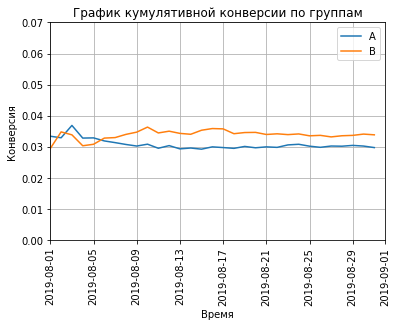

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation='vertical')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Конверсия')
plt.xlabel('Время')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.07]) 

### Вывод

Конверсия у групп не сильно разнится, однако группа B почти на всем отрезке тестового периода - лидирует.

#### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

['2019-08-01', '2019-09-01', -0.15, 0.25]

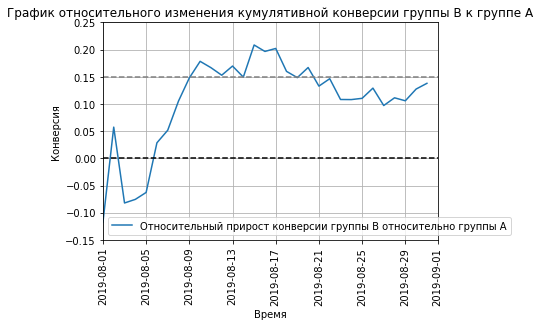

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.xticks(rotation='vertical')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Конверсия')
plt.xlabel('Время')
plt.axis(["2019-08-01", '2019-09-01', -0.15, 0.25]) 

### Вывод

На графике мы видим, что группа B стабильно лидирует почти на всем протяжении тестового периода. Явных тендеций к уменьшению отрыва не наблюдается.

#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','transactionid']

ordersByUsers.sort_values(by='transactionid',ascending=False).head(10)

,visitorid,transactionid
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


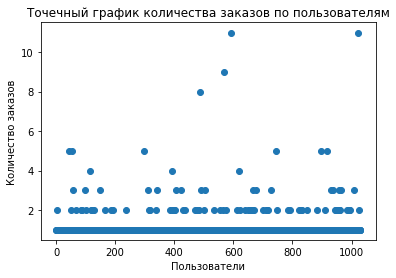

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionid']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

### Вывод

На графике видим, что присутствует достаточно большое количество выбросов.

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
np.percentile(ordersByUsers['transactionid'], [90, 95, 99])

array([1., 2., 4.])

### Вывод

В качестве границы для определения аномальных зон возьмем 99-й процентиль. На графике видим, что значений в диапозоне от 2 до 4 достатчтоно много и это достаточно типичные случаи. 

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

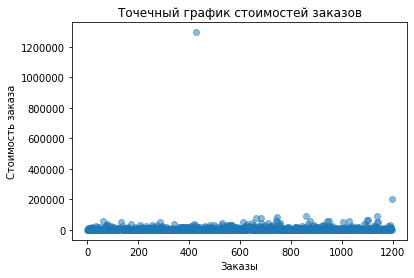

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы')
plt.show()

### Вывод

На графике видно, что в целом выбросов не так много, но есть как минимум один - крайне существенный.

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

### Вывод

Здесь чуточку сложнее определить границу, поэтому в качестве границы возьмем 95-й процентиль, дабы выдержать баланс :)

#### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для начала определим нулевую и альтернативную гипотезу:

- Нулевая гипотеза: статистически значимых различий между группами нет
- Альтернативная гипотеза: статистически значемые различия между группами есть

In [ ]:
orders.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [ ]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [ ]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [ ]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [ ]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [ ]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [ ]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


### Вывод

P-value ниже 5%, а значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. С вероятность 1.7% относительный выигрыш группы B случаен. 

Относительный выигрыш группы B равен 13%. 

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


### Вывод

А вот в случае со среднем чеком ситуация немного иная. P-value существенно выше 5%, а значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. А вот относительный выигрыш групп B здесь равен уже 25%, что весьма существенно 

#### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorid, dtype: int64
(59,)


In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.018
0.145


### Вывод

Существенных различий между сырыми и очещенными данным не наблюдается. А значит можно сделать вывод, что выбросы здесь особой роли не играют.

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.961
-0.014


### Вывод

Здесь же есть существенные различия. Значение P-value все также выше 5%, однако относительный выигрыш групп B уменьшился с 25% до -0.14%, а то бишь группа B уступает группе А в показатели среднего чека по очищенным данным. 

Так как P-value выше 5% - нулевую гипотезу мы не отвергаем.

#### 14. Примите решение по результатам теста и объясните его

По итогу мы можем сделать следующие выводы:

- Есть статистически значимые различия в конверсии между группами. Как по сырым данным, так и по очищенным. Разница составляет 13-15%.
- Нет статистически значимых различий в среднем чеке между группами. Как по сырым данным, так и по очищенным. 
- На графике относительного изменения кумулятивной конверсии мы видим, что группа B стабильно лидирует почти на всем протяжении тестового периода. Явных тендеций к уменьшию или увеличению отрыва не наблюдается.
- На графике относительного изменения кумулятивного среднего чека видим лидерство группы B, однако наблюдается явная тенденция к уменьшению отрыва. После очистики данных относительный выигрыш группы B уменьшился с 25% до -0.14%, а то бишь группа B незначительно уступает группе А в показатели среднего чека по очищенным данным.


По итогам теста рекомендую признать его успешным: не смотря на то, что нет статистически значимых различий в среднем чеке между группами, есть статистически значимые различия в конверсии в районе 13-15%. 
